<a href="https://colab.research.google.com/github/EricaCQ/EricaCQ/blob/main/T1_ML_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Programa de Pós-graduação em Ciências da Computação (PPCIC)
### Centro Federal de Educação Tecnológica Celso Suckow da Fonseca – (CEFET/RJ)
###Disciplina: Aprendizado de Máquina
###Prof.: Eduardo Bezerra
###Aluna: Érica Carneiro



Para a correta execução das funções de predição em aprendizado de máquina, o uso de algumas bibliotecas em Python são de grande para o auxílio e execução dos algoritmo presentes neste trabalhos.
Ressalta-se que optou-se por executar todas as funções dentro do presente documento de modo a facilitar a visualilzação, aprendizado e possíveis inferências que as mesmas poderiam trazer ao leitor e autor do presente documento. 

# Importação de bibliotecas

As bibliotecas relacionadas abaixo foram utilizadas no presente documento. Todas são de fundamental importância para a execução das funções e execução dos algoritmos de aprendizado de máquina para o desenvolvimento deste trabalho.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Usado para plotar 3d em fig.gca
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.io
import scipy.io as sio
import scipy.optimize as opt
import requests

# Importação de Arquivos

A fim de facilitar o desenvolvimento e agilizar as etapas de importação de arquivos, optou-se pela  importação automática de arquivos salvos no drive pessoal do Google. Como o Google Colab exige que arquivos e algoritmos sejam reprocessados ou importados novamete, a aplicação abaixo evita o constante *upload* individual de *data frames*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dir = '/content/drive/My Drive/AM-T1-dados'
os.chdir(dir)

## 1. Regressão Linear com uma Variável

A seguir, demonstrar-se-á um passo a passo de modo a implementar a regressão linear com uma variável, também denominada regressão linear simples. As análises que se utilizam deste tipo de equação possuem apenas duas variáveis, uma dependente e outra independente. Sua fórmula pode ser representada pela função da equação linear:

y= a + bx

É importante destacar que a relação entre as variáveis possibilitará a predição ou estimativa de outras variáveis.

A aplicação abaixo tem como objetivo predizer o lucro para uma cadeia de food truck. Valores negativos correspondem a filiais cujo retorno de investimento não corresponde ao esperado.



# 1.1 Visualização de dados


A função abaixo é utilizada para importar os dados presentes em todos os arquivos. Ela será repetida a cada etapa do desenvolvimento deste trabalho por meio do comando *importarDados*. As informações entre parênteses correspondem à localização e nome do arquivo e devem ser atualizadas a cada chamado da função, de modo a substituir os *data frames* analisados em cada questão. A saber, questões 1, 2, 3, 4, 5, 6 e 7.

As variáveis equalizadas abaixo dimensionam os valores para o eixo x e y de infinito a 0 e - 1.

X = data.iloc[:, 0:-1].values

y = data.iloc[:, -1:].values

Já a função *return* executa o comando retornando os valores das variáveis.


In [ ]:
def importarDados(filepath, names):
    path = os.getcwd() + filepath  
    data = pd.read_csv(path, header=None, names=names)

    X = data.iloc[:, 0:-1].values
    y = data.iloc[:, -1:].values

    return X, y


## 1.1 Plotando ou visualizando os dados em gráfico de dispersão


O primeiro comando, como já mencioado, chama a função importarDados. Desta forma, a função *def plot()* localiza o *data frame* a ser visualizado. Após a definição dos dados suprecitada, a função *def plot* necessita da parametrização para a visualização das informações que serão apresentadas no gráfico. Optou-se por evitar comentários no código a fim de evitar a poluição do mesmo, sendo assim, a explicação dos parâmetros de representação gráfica serão explicados abaixo pontualmente.

Define as cores (*blue*) e marcadores (*) utilizados na visualização -> plt.scatter(X.T, y, color='blue', marker='*')

Fornece o título do gráfico apresentado ->
plt.title('Populacao da cidade x Lucro da filial')

Nomeação do eixo x -> 
plt.xlabel('Populacao da cidade (10k)')

Nomeação do eixo y -> 
plt.ylabel('Lucro (10k)')

Os comandos *filepath* salvam o arquivo em imagem gerado em uma nova pasta enquanto *plt.show()* apresenta a figura, ou seja, representação imagética dos gráficos gerado pelos dados supracitados.



In [ ]:




def plot():
    X, y = importarDados(filepath="/ex1data1.txt", names=["Population","Profit"])

    plt.scatter(X.T, y, color='blue', marker='*')
    plt.title('Populacao da cidade x Lucro da filial')
    plt.xlabel('Populacao da cidade (10k)')
    plt.ylabel('Lucro (10k)')

    filename = 'target/plot1.1.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

O comando *plot()* chama a função acima, apresentando a imagem gerada.

Conforme visualizado na imagem abaixo, quanto maior a população de uma cidade, maior será o lucro da filial.

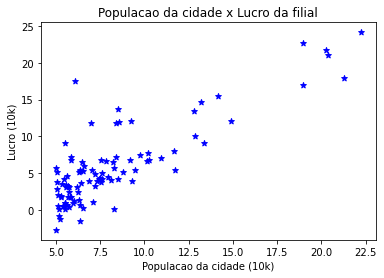

In [ ]:
plot()

# 1.2 Gradiente descendente

Utiliza-se o método do Gradiente Descendente para encontrar o valor mínimo de uma função representada matematicamente por:

β(k+1)=β(k)+αk∇J(β(k))

As variáveis acima podem ser representadas da seguinte maneira:

αk = tamanho do passo utilizado no algoritmo;
∇J(β(k)) = gradiente da função custo no ponto β(k). 

É importante ressaltar que o algoritmo exige a estipulação de um valor β0, *i.e.*, um valor de estimativa aleatório inicial para o parâmetro. Desta forma, podemos representar a nova função por:

h0(x)=β0+β1x

A partir das informações acima, a representação matemática de J, presente na função abaixo, pode ser dada por:

J(θ∼)=12m∑i=1m(hθ(x)i)−y(i))2



In [ ]:
def custo_reglin_uni(X, y, theta):

    # Quantidade de exemplos de treinamento
    m = len(y)

    # Computar a funcao do custo J
    J = (np.sum((X.dot(theta) - y)**2)) / (2 * m)

    return J

Importação dos dados e nomeação das colunas como "*Population" e "Profit"

In [ ]:
X, y = importarDados(filepath="/ex1data1.txt", names=["Population","Profit"])


As duas linhas abaixo retornam o o custo dos valores de theta e inicializam todos os parâmentros com 0.

In [ ]:
theta = np.array([0,0],ndmin=2).T

In [ ]:
J = custo_reglin_uni(X,y,0)
print ("Custo J(theta) = {0:.5}".format(J),"para Gradiente = 0.0")

Custo J(theta) = 32.073 para Gradiente = 0.0


Retorna os valores de X após a parametrização e com uma coluna de 1.

In [ ]:
X=np.c_[np.ones((X.shape[0],1)),X]
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

Retona o valor de theta

In [ ]:
theta = np.array([0,0],ndmin=2).T
print(theta)

[[0]
 [0]]


Utiliza-se a função *def gd_reglin_uni* a fim de implementar o gradiente descendente e otimizar Θ (theta) e, desta forma, permitir a minimização da função de custo J (Θ), representada acima por 
J = custo_reglin_uni

Usa-se a matriz numpy X, y e theta e atualiza theta executando passos de gradiente num_iters com taxa de aprendizagem de alfa para retornar theta e a lista do custo de theta durante cada iteração.

Ao fim a função *print foi convocada de modo a  comprovar vaor de encontrado na funão *custo reglin*

In [ ]:
def gd_reglin_uni(X, y, alpha, epochs, theta = np.array([0,0], ndmin = 2).T):

    m = len(y)

    cost = np.zeros(epochs)

    for i in range(epochs):
    	h = X.dot(theta)
    	loss = h - y
    	gradient = X.T.dot(loss) / m
    	theta = theta - (alpha * gradient)
    	cost[i] = custo_reglin_uni(X, y, theta = theta)

    return cost[-1], theta
    
custo, theta = gd_reglin_uni(X, y , 0.01, 5000)
print(custo)


4.476971396982805


In [ ]:
print(theta)

[[-3.89530051]
 [ 1.19298539]]


Theta[0][0] + (theta[1][0]*t
Tupla [[0][1]]
Elemento 1 dentro datupla maior = elemento 0 da tupla maior
Elemento 2 da tupla maior = elemento 1 da tupla menor
Porém ambos são o primeiro, i.e, 0zésimo elemento das mini tuplas.

O theta foi alterado do codigo original, devido ao elemento theta, ter mais de uma variável possível. 




# Plot para visualização da reta com valores preditos

A função *def plot_reta1* apresenta os parâmetros de visualização da reta obtida com os valores de predição da função gerada a partir dos parâmetros previamente definidos nos blocos acima. A saber:

As variáveis equalizadas abaixo dimensionam os valores para o eixo x e y de infinito a 0 e - 1.

X = data.iloc[:, 0:-1].values

y = data.iloc[:, -1:].values


Definição do treinamento -> t = np.arange(0, 25, 1)

Definição de cores , marcadors e legenda no gráfico para os parâmetros de treino ->
    plt.scatter(X, y, color='purple', marker='*', label='Dados de Treino')


Definição das cores e da legenda para Regressão Linear ->
    plt.plot(t, theta[0][0] + (theta[1][0]*t), color='orange', label='Regressão Linear')


Definição do eixo x -> 
    plt.axis([4, 25, -5, 25])


Fornece o título do gráfico ->
    plt.title('População da cidade x Lucro da filial')


Nomeia o eixo X ->
    plt.xlabel('População da cidade (10k)')


Nomeia o eixo y ->
    plt.ylabel('Lucro (10k)')


In [ ]:
def plot_reta1(filepath, theta):
    path = os.getcwd() + filepath
    dataset = pd.read_csv(path, header=None)
    X = dataset.iloc[:, 0:-1].values
    y = dataset.iloc[:, -1:].values

    t = np.arange(0, 25, 1)
    plt.scatter(X, y, color='purple', marker='*', label='Dados de Treino')
    plt.plot(t, theta[0][0] + (theta[1][0]*t), color='orange', label='Regressão Linear')
    plt.axis([4, 25, -5, 25])
    plt.title('População da cidade x Lucro da filial')
    plt.xlabel('População da cidade (10k)')
    plt.ylabel('Lucro (10k)')
    
    filename = 'target/plot1.2.png'
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)

Chamando a função para visualização/ plot do gráfico com a rera de regressão linear em relação aos dados de treino.

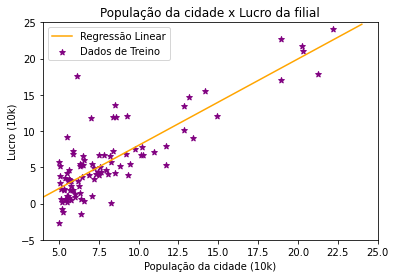

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_reta1("/ex1data1.txt", theta)

## Visualização do Lucro

In [ ]:
def lucro(pop, theta):
  y = theta[0][0] + theta[1][0]*pop
  return y


In [ ]:
print("Para população = 35,000, predizemos um lucro de $"+str(lucro(35000,theta)))

Para população = 35,000, predizemos um lucro de $41750.59321117702


In [ ]:
print("Para população = 70,000, predizemos um lucro de $"+str(lucro(70000,theta)))

Para população = 70,000, predizemos um lucro de $83505.0817228647


# 1.3 Visualização de $J(\theta)$




A função *def plot_contour* contém a parametrização dos valores de theta informados no enunciado do trabalho. A seguir, J é definido com seus valores iniciados com zero. O loop para o range de theta preenche os sucessivos valores de J. Ao fim, o comando np.transpose, transpoem os valores de J, invertendo as colunas. 

Para o plot, os contornos de J foram definidos em azul e os eixos x e y correspondem a theta0 e theta1.

In [ ]:
def plot_contour(X, y, theta):
    # Valores de theta0 e theta1 informados no enunciado do trabalho
    theta0 = np.arange(-10, 10, 0.01)
    theta1 = np.arange(-1, 4, 0.01)

    # Inicia os valores de J com zeros
    J = np.zeros((len(theta0), len(theta1)))

    # Preenche os valores sucessivos de J
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            t = [[theta0[i]], [theta1[j]]]
            J[i,j] = custo_reglin_uni(X, y, t)

    # Transpoe J devido as funcoes contour/meshgrid
    J = np.transpose(J)

    # Plota a funcao de custo utilizando levels como logspace. Range -1 ~ 4 devido ao
    # range de theta1 e 20 pois o theta0 tem 20 valores (-10 ate 10)
    fig = plt.figure()
    fig, ax = plt.subplots()
    ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20), color='blue')
    ax.plot(theta[0,0], theta[1,0], 'rx')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.show()

    filename = 'target/plot1.3.1.png'
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)

    return J


Chama a função plot_contour para visualização 

o x em vermelho representa mínimo global, ou seja, o theta ótimo. Já as elipses são as curvas de níveis de um parabolóide em 2D. Quanto mais longe do mínimo global maior será o custo (J).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'color'


<Figure size 432x288 with 0 Axes>

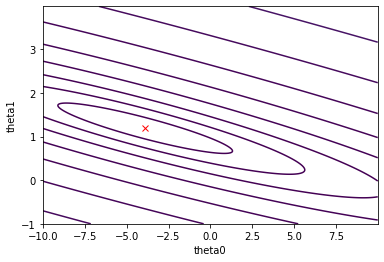

<Figure size 432x288 with 0 Axes>

In [ ]:
J = plot_contour(X, y, theta)


A função *def_plot surface demonstra a versão 3D de J. 

In [ ]:
def plot_surface(J):
    # Valores de theta0 e theta1 informados no enunciado do trabalho
    theta0 = np.arange(-10, 10, 0.01)
    theta1 = np.arange(-1, 4, 0.01)
    

    # Comandos necessarios para o matplotlib plotar em 3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    # Plotando o grafico de superficie
    theta0, theta1 = np.meshgrid(theta0, theta1)
    surf = ax.plot_surface(theta0, theta1, J)
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.show()

    filename = 'target/plot1.3.2.png'
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)

    return surf

Chamando a função para visulização de J em 3D.

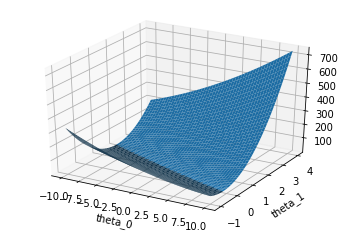

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_surface(J)

# 2. Regressão Linear com Múltiplas Variáveis

Como já visto, a regressão linear é utilizada para estabelecer relações entre as variáveis, possibilitando a predição ou estimativa de outras variáveis. Ao contrário a regressão linear simples, a aplicação a seguir utilizará mais de uma variável a fim de executar suas predições.





Abre-se o arquivo ex1data2.txt com os valores de tamanho, dormitórios e preço dos imoveis.

In [ ]:
f2 = pd.read_csv("ex1data2.txt", names = ["Tamanho", "Cômodos", "Valor"])
f2.head()

,Tamanho,Cômodos,Valor
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
f2 = pd.read_csv("ex1data2.txt", header=None, names=["tamanho", "Comodos", "valor"])
f2.head()
#Lendo dados utilizando o código dado para o trabalho
#X2, y2 = importarDados("/ex1data2.txt", names=['Tamanho','Cômodos', 'valor'])""

,tamanho,Comodos,valor
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Apresentação a dimensão da matriz do arquivo ex1data2.

In [ ]:
f2.shape

(47, 3)

In [ ]:
X2, y2 = importarDados(filepath="/ex1data2.txt", names=["tamanho", "Comodos", "valor"])

Abaixo, apresenta-se os valores da média e desvio padrão de cada caracrterística.

In [ ]:
mt, md, mv = f2.mean()
#O valor da média será modificado quando normalizado. Como temos armazenado em f2, não esterei armazenando a partir de X2
np.mean(X2, axis=0)

array([2000.68085106,    3.17021277])

Resume as estatísticas de dados.

In [ ]:
f2.describe()

,tamanho,Comodos,valor
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


# 2.1 Normalização das características

A normalização realiza uma operação vetorizada. 

In [ ]:
#Z-Score norm
def normalizar(X):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_norm = (X - mean_X) / std_X

    # Incluir o valor de 1 em x, pois theta0 = 1
    X_norm = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

    return X_norm

Chamando a função normalizar para a variável X2. 

A normalização de recursos faz-se necessária em problemas com multivariáveis na gradiente descendente, pois aceleram o processo de otimização.

In [ ]:
X2 = normalizar(X2)

In [ ]:
def custo_reglin_multi(X, y, theta):
    # Quantidade de exemplos
    m = len(y)

    # Computa a funcao de custo J
    J = (np.sum((X.dot(theta)- y)**2)) / (2 * m)

    return J

A função *def gd* permite impantação de gradiente descendente utilizada na questão 1, porém para mais de uma variável. No caso abaixo, ela é aplicada para X e y.

In [ ]:
def gd(X, y, alpha, epochs, theta=np.array([0,0,0], ndmin = 2).T):

    m = len(y)

    cost = np.zeros(epochs)

    for i in range(epochs):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - (alpha * gradient)
        cost[i] = custo_reglin_multi(X, y, theta=theta)

    return cost[-1], theta


In [ ]:
def custo_reglin_multi(X, y, theta):
    # Quantidade de exemplos
    m = len(y)

    # Computa a funcao de custo J
    J = (np.sum((X.dot(theta)- y)**2)) / (2 * m)

    return J

In [ ]:
custo, theta2 = gd (X2, y2, 0.01, 5000)
print("O custo é ",custo)
print("O vetor theta corresponde aos valores",theta2)

O custo é  2043280050.6028287
O vetor theta corresponde aos valores [[340412.65957447]
 [109447.79645425]
 [ -6578.35483877]]


# 3.Regressão Logística

A regressão logística é usada em problemas de classificação cujos rótulos são números discretos. Já na regressão linear, os rótulos são variáveis ​​contínuas.

### 3.1 Visualização de dados

Importando e visualizando dados.

In [ ]:
f3 = pd.read_csv("ex2data1.txt", names = ["Avaliação 1", "Avaliação 2", "Classificação"])
f3.head()

,Avaliação 1,Avaliação 2,Classificação
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
f3 = pd.read_csv("ex2data1.txt", header=None, names=["Avaliação 1", "Avaliação 2", "Classificação"])
f3.head()

,Avaliação 1,Avaliação 2,Classificação
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
X3, y3 = importarDados(filepath="/ex2data1.txt", names=["Avaliação 1", "Avaliação 2", "Classificação/"])


A função abaixo fornece os parâmetros para a visualização do gráfico, semelhante aos já descritos em sessoões anteriores,

In [ ]:
def plot3(data, filename = 'target/plot3.1.png'):
    # gerando o grafico de dispersao para analise preliminar dos dados
    positivo = data[data['Classificação'].isin([1])]
    negativo = data[data['Classificação'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positivo['Avaliação 1'], positivo['Avaliação 2'], s=50, c='k', marker='+', label='Classificado')
    ax.scatter(negativo['Avaliação 1'], negativo['Avaliação 2'], s=50, c='y', marker='o', label='Não Classificado')
    ax.legend()
    ax.set_xlabel('Nota da Avaliação 1')
    ax.set_ylabel('Nota da Avaliação 2')

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

Visualização do Gráfico de dispersão com as notas das Avaliações 1 e 2

É possível inferir pela image abaixo que apenas uma nota muito alta em apenas uma das valiações não garante a aprovação do aluno. Sendo assim, é possível sugerir que as notas são dadas por média aritmética com peso 1 para cada uma das avaliações. 

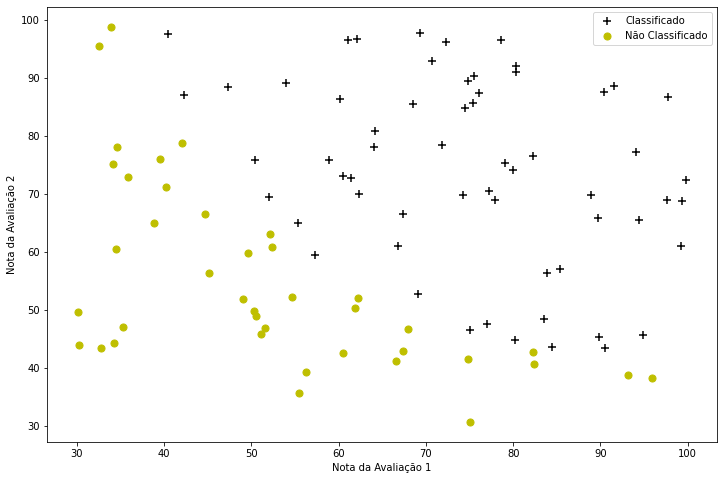

In [ ]:
plot3(f3)

## 3.2 Implementação 

## 3.2.1 Função Sigmoide

A função sigmoide é utilizada para diferenciar a regressão logística da linear. Sua definição é dada a seguir com z = 0 e retorna o valor de 0,5.

In [ ]:
def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

In [ ]:
print(sigmoide(0))

0.5


Testes com valores de sigmoides muito altos retornam o valor de um. 

In [ ]:
print(sigmoide(1000000000))

1.0


Teste com valor de simoide muito baixo retorna um valor de 0. 

In [ ]:
print(sigmoide(-100000000))

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


A função *custo_reglog* calcula o valor de J(Θ) e gradiente, *i.e.*, a derivada parcial de J(Θ) em relação a cada Θ.

In [ ]:
def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    J = np.sum(grad0 - grad1) / (len(X))
    return J


Como já visto, a normalização de recursos faz-se necessária em problemas com multivariáveis na gradiente descendente, pois aceleram o processo de otimização.

In [ ]:
X3 = normalizar(X3)

In [ ]:
#X3 = np.c_[np.ones((X3.shape[0], 1)), X3]##

Função para normalização das características de X e y (Z-score)


In [ ]:

def normalizar_reglog(X, y):
  mean_examData = np.mean(X, axis = 0)
  std_examData = np.std(X, axis = 0)
  X_norm = (X - mean_examData) / std_examData

  mean_labels = np.mean(y, axis=0)
  std_labels = np.std(y, axis = 0)
  labels_norm = (y - mean_labels) / std_labels

#Incluir o valor de 1 em X, já que theta0 = 1
  examData_norm = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]
  return examData_norm, labels_norm, mean_examData, std_examData, mean_labels, std_labels


In [ ]:
#X3 = f3.iloc[:, 0:-1].values##
#y3 = f3.iloc[:, -1:].values##

Retorno com as dimensões de X3, theta, e y3.



In [ ]:
X3.shape, theta.shape, y3.shape

((100, 3), (1, 3), (100, 1))

Implementando a normalização de X e y

In [ ]:
#examData_norm, labels_norm, mean_examData, std_examData, mean_labels, std_labels = normalizar_reglog(X3,y3)#


In [ ]:
labels_norm.shape

(100, 1)

In [ ]:
theta = np.array([0,0,0], ndmin=2)

Comprovação de valor produzido.

In [ ]:
J = custo_reglog(theta, X3, y3)
print(J)

0.6931471805599453


In [ ]:
J = custo_reglog(theta, X3, y3)
print(J)

0.6931471805599453


## 3.2.3 Aprendizado dos parâmetros


Utiliza-se a função sigmoide para diferenciar a aplicação de caso de regressão logística.

In [ ]:
def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

Aplica-se a função *gd_reglog*, uma vez que mais de uma variável será trabalhada.

In [ ]:
def gd_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad  
    
       


A função *custo_reglog* é aplicada mais uma vez a fim de calcular o valor de J(Θ) e do gradiente, *i.e.*, da derivada parcial de J(Θ) em relação a cada Θ.

A função *fmin_tnc*, presente na biblioteca scipy.optimize, bem como a implmentação do gradiente descendente, são utilizados para encontrar o vetor de theta, minimizando a função de custo.

In [ ]:
def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    return np.sum(grad0 - grad1) / (len(X))

In [ ]:
#theta = np.zeros((X3.shape[0], 1))

É possível perceber que a queda é mais acentuada e o plateau da função de custo gira em torno das 150 iterações. Usando esses valores, o custo resultante é 0,20360044248226664. Uma melhoria significativa em relação aos 0,693147180559946 iniciais.

In [ ]:
import scipy.optimize as opt
from scipy.optimize import minimize
result = opt.fmin_tnc(func = custo_reglog, x0 = theta, fprime = gd_reglog, args = (X3, y3))
custo_reglog(result[0], X3, y3)

0.20349771564631666

## 3.2.4 Avaliação do Modelo


A função *def predizer* retorna uma matriz booleana com True (1) se a probabilidade de admissão na universidade for maior que 0,5 e False (0) para o caso contrário. 

In [ ]:
def predizer(theta, X):
    probabilidade = sigmoide(np.mat(X) * np.mat(theta.T))
    return [1 if x >= 0.5 else 0 for x in probabilidade]


Chamando a função *predizer*.

In [ ]:
predizer(theta, X3)



[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:

def acuracia(X, y, result):
    theta_min = np.matrix(result[0])  
    predicoes = predizer(theta_min, X)  
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]  
    return (sum(map(int, corretas)) % len(corretas))

Os valores abaixo não foram dados em porcentagem, porém, é possível inferir que a acurácia é de 89%.  Indica, ainda que o classificador prevê 89% do conjunto de treinamento previsto corretamente.


In [ ]:
acuracia(X3,y3,result)



89

# 4. Regressão Logística com Regularização

Regularização é o uso da regressão logística com a inserção de *bias* em um modelo. Resumidamente, *bias* é uma métrica de erro no modelo e seu bom balanceamento ajuda na obtenção de alta acurácia preditiva. Quando alta, *bias* indica que o modelo não se ajusta integralmente aos dados de treino, causando um fenômeno denominado *underfitting*, ou seja, tem alto *Erro Quadrático Médio*.

Desta forma, poderia-se dizer que a regularização desencoraja o ajuste excessivo dos dados, visando diminuir sua variância. Dentro da regressão linear, Ridge e Lasso são formas de regularizar a função com penalidades. 



Importando e visualizando os dados.

In [ ]:
f4 = pd.read_csv("ex2data2.txt", header=None, names=["Teste 1", "Teste 2", "Aceito"])
f4.head()

,Teste 1,Teste 2,Aceito
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
X4, y4 = importarDados(filepath="/ex2data2.txt", names=["Teste 1", "Teste 2", "Aceito"])

Função para visualização do gráfico de dispersão. Nela são definidos os *labels* (legendas, marcadores de demais identificadores) presentes no gráfico que auxiliam na interpretação das informações *plotadas*.

In [ ]:
def plot4(data, filename = 'target/plot4.1.png'):
    # gerando o grafico de dispersao para analise preliminar dos dados
    positivo = data[data["Aceito"].isin([1])]
    negativo = data[data["Aceito"].isin([0])]

#Definição de rótulos
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positivo["Teste 1"], positivo["Teste 2"], s=50, c='k', marker='+', label="Aceito")
    ax.scatter(negativo["Teste 1"], negativo["Teste 2"], s=50, c='y', marker='o', label="Nao Aceito")
    ax.legend()
    ax.set_xlabel("Microchip 1")
    ax.set_ylabel("Microchip 2")

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()
   

Chama a função *plot* para visualização do gráfico de dispersão.

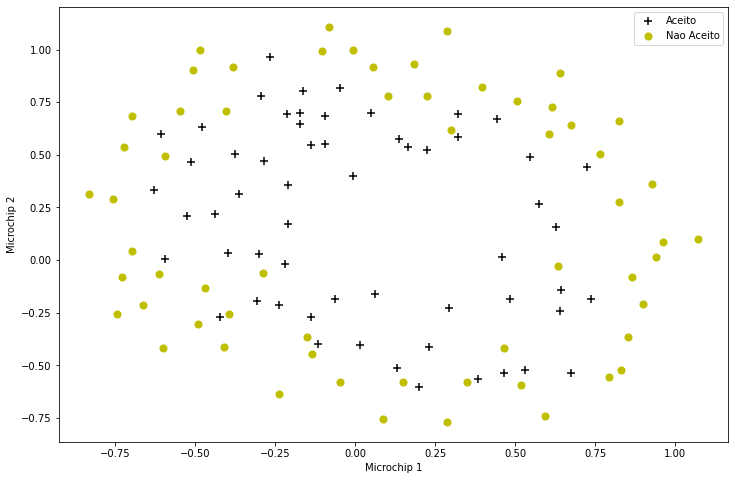

In [ ]:
 plot4(f4)

### 4.2 Mapeamento de Características (*feature mapping*)





Atualmente, com a quantidade de dados sendo trabalhados em diversos projetos, o tempo de processamento e quantidade de dados irrelevantes visualizados se tornam um problema na hora de tomar decisões rápidas e apropriadas baseadas em imagens e gráficos. Assim, quanto mais rápido uma informação for visualizada, mais rápida será a inferência necessária para a tomada de decisões. 

O *feature mapping* é um processo de representação de *feature* que ressalta sua relevância no gráfico. Desta forma, as *features* são visualizadas e suas informações correspondentes ficam facilmente visíveis em imagem. A função *feature mapping* auxilia criando mais características aos dados já existente (X1 e X2), ressaltando-os e tornando-os mais apropriados para a classificação. 



In [ ]:
def mapFeature(x1, x2, degree=6):

    if x1.ndim > 0:
        out = [np.ones(x1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))

    if x1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

Abaixo, a função *map feature* é chamada a fim de mapear duas *features* diferentes e aplicando um grau polinomial e retonando os vetores polinomiais de X1 e X2.

O resultado é um vetor com 28 colunas e 118 linhas, conforme visto na saída por meio da função *print*.

In [ ]:


feature_1 = np.array(X4[:,0])
feature_2 = np.array(X4[:,1])

X = mapFeature(feature_1, feature_2)

print(X.shape)

(118, 28)


In [ ]:
X4 = mapFeature(feature_1, feature_2)
print(X4.shape)



(118, 28)


## 4.3 Função de Custo Gradiente

A função de custo gradiente aplicada a fim de calcular a função de custo e o gradiente. Ela auxilia a estimar a da probabilidade de ocorrência de determinado evento (J3) dentro de um conjunto de variáveis exploratórias (Vetor de parâmetros) 

In [ ]:
def custo_reglog_reg(theta, X, y, _lambda):
    m = len(X)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    
    # não considera theta0 para o cálculo
    theta_j = theta[:,1:]
    regularizacao = (_lambda / (2 * m)) * np.sum(np.dot(theta_j.T,theta_j))     
    return np.sum((grad0 - grad1) / m) + regularizacao

def gd_reglog_reg(theta, X, y, _lambda):
    m = len(X)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:,i])
        if (i != 0):
            regularizacao = ((_lambda / m) * theta[:,i])
            grad[i] = (np.sum(term) / m) + regularizacao
        else:
            grad[i] = np.sum(term) / m 

    return grad

Teste de função *custo_reglog_reg* com λ = 1 

In [ ]:
_lambda = 1
theta = np.zeros((X4.shape[1])) #inicialização
J2 = custo_reglog_reg(theta, X4, y4, _lambda)
print('Custo = ', J2)

Custo =  0.6931471805599451



Para $\lambda$ = 0 (sem regularização)

Apenas separando a função do gradiente


In [ ]:
def gd_reglog_reg(theta, X, y, _lambda):
    m = len(X)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:,i])
        if (i != 0):
            regularizacao = ((_lambda / m) * theta[:,i])
            grad[i] = (np.sum(term) / m) + regularizacao
        else:
            grad[i] = np.sum(term) / m 

    return grad

Teste de corretude inicial da função *custo_reglog_reg* com λ = 0

In [ ]:
_lambda = 0
theta = np.zeros((X4.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X4, y4, _lambda))
theta = result[0]
J3 = custo_reglog_reg(theta, X4, y4, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J3)

Vetor de parâmetros =  [   12.77908481    16.49992762     7.36168342  -140.0689641
   -82.626573     -47.32272413  -134.29479797  -113.6610402
   -56.14324677    -4.10861092   510.70466523   507.56922885
   566.66305886   258.98915504    56.95402121   247.5193485
   350.83103498   371.75202507   194.13604466    69.46621389
    15.14801323  -600.92424344  -821.86040683 -1106.80924821
  -848.64036255  -706.48745788  -292.82673998   -50.26186711]

Custo =  0.25308573494688313


Para $\lambda$ = 100

Teste de função *custo_reglog_reg* com λ = 100

In [ ]:
_lambda = 100
theta = np.zeros((X4.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X4, y4, _lambda))
theta = result[0]
J4 = custo_reglog_reg(theta, X4, y4, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J4)

Vetor de parâmetros =  [ 2.87015383e-04 -2.10544242e-03  1.22391072e-03 -6.79678110e-03
 -1.74408066e-03 -4.46041042e-03 -2.26497645e-03 -9.37866502e-04
 -1.13248462e-03 -2.62435498e-03 -5.46183984e-03 -3.06831194e-04
 -1.75796213e-03 -4.68279970e-04 -5.03984839e-03 -2.62545344e-03
 -5.89312935e-04 -4.48411790e-04 -7.84188445e-04 -6.48156747e-04
 -3.88185402e-03 -4.31900558e-03 -1.35539797e-04 -8.84096665e-04
 -4.96564783e-05 -9.97763028e-04 -2.09723993e-04 -5.06602296e-03]

Custo =  0.6927650676796886


Para $\lambda$ = 1

In [ ]:
_lambda = 1
theta = np.zeros((X4.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X4, y4, _lambda))
theta = result[0]
J4 = custo_reglog_reg(theta, X4, y4, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J4)

Vetor de parâmetros =  [ 0.51126521  0.28141979  0.56732707 -0.89264983 -0.33269562 -0.50931638
  0.06978521 -0.14679472 -0.15051146 -0.04162217 -0.63602971 -0.03068704
 -0.26998237 -0.08940903 -0.47099374 -0.07027425 -0.08868329 -0.0384868
 -0.11459476 -0.10674824 -0.18602658 -0.43208855  0.00445043 -0.13397984
 -0.00181124 -0.14157615 -0.03660799 -0.37996296]

Custo =  0.651887301156613


## 4.4 Esboço da fronteira de decisão

*%matplotlib inline* executa uma configuração necessária para que o IPython funcione corretamente com matplotlib. Não há uma nova importação.

In [ ]:
%matplotlib inline

A função *plot_microship_data* gera o gráfico de dispersão com os rótulos adequados, conforme já visto em exemplos semelhantes anterioemente.

In [ ]:
def plot_microship_data(data, filename = 'target/plot4.1.png'):
  # Gera o gráfico de dispersão para análise preliminar dos dados
  positivo = data[data['Aceito'].isin([1])]  
  negativo = data[data['Aceito'].isin([0])]
  
  fig, ax = plt.subplots(figsize=(12,8))
  ax.scatter(positivo["Teste 1"], positivo["Teste 2"], s=50, c='k', marker='+', label="Aceito")
  ax.scatter(negativo["Teste 1"], negativo["Teste 2"], s=50, c='y', marker='o', label="Nao Aceito")
  ax.legend()
  ax.set_xlabel("Microchip 1")
  ax.set_ylabel("Microchip 2")
  
  if not os.path.exists(os.path.dirname(filename)):
    os.makedirs(os.path.dirname(filename))
    
    plt.savefig(filename)
    plt.show()




In [ ]:
theta = np.array(theta)


A função *plotDecisionBoundary4* irá desenhar a fronteira de decisão do gráfico que será gerado mais abaixo.


In [ ]:
def plotDecisionBoundary4(data, filename = 'target/plot4.1.png'):
 
    if X.shape[1] <= 3:
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        #calcular fronteira de decisão
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        #ajuste 
        plt.plot(plot_x, plot_y)

        #legendas
        plt.legend(['Admitido', 'Não admitido', 'Fronteira de decisão'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        #alcance do grid
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-0.8, 1.2, 50)

        z = np.zeros((u.size, v.size))
        
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  
        
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


A seguir a plotagem das informações com os diversos dados representados pelos pontos. A fronteira de decisão gerada pela função *plotDecisionBoundary4* é traçada no círculo em verde escuro.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'lambda = 1.00')

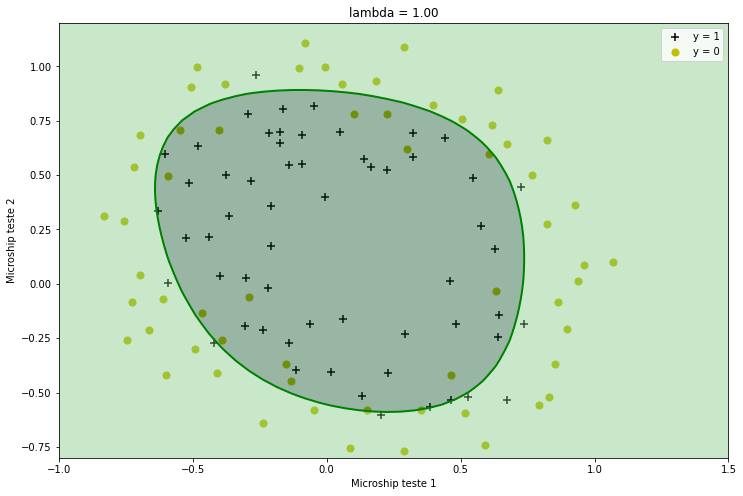

In [ ]:
plot_microship_data(f4)
plotDecisionBoundary4(f4)
plt.xlabel('Microship teste 1')
plt.ylabel('Microship teste 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % _lambda)

# 5. Regressão Linear com Regularização

Importação de dados dentro de arquivo .mat. 


In [ ]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t1/data/ex5data1.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex5data1.mat', 'wb').write(r.content)

data = scipy.io.loadmat('ex5data1.mat')

_X, y = data['X'], data['y'] # conjunto de treinamento
_Xval, yval = data['Xval'], data['yval'] # conjunto de validação
_Xtest, ytest = data['Xtest'], data['ytest'] # conjunto de teste

### 5.1 Visualização dos Dados¶

Função para a plotagem dos dados. Inclui os rótulos dos eixos X e Y

In [ ]:
def plot_ex5data1(X, y):
    plt.figure(figsize=(8,5))
    plt.xlabel('Mudança no nível da água (x)')
    plt.ylabel('Água saindo da barragem (y)')
    plt.plot(X,y,'rx')

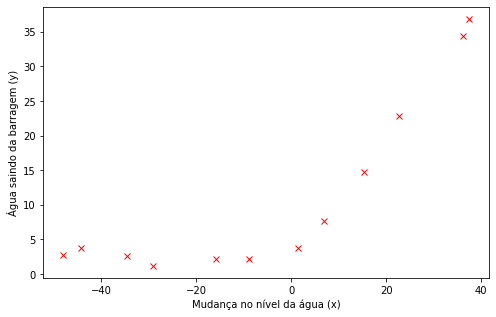

In [ ]:
plot_ex5data1(_X, y)

In [ ]:
X = np.insert(_X, 0, 1, axis=1)
Xval = np.insert(_Xval , 0, 1, axis=1)
Xtest = np.insert(_Xtest, 0, 1, axis=1)

### 5.2 Função de custo da regressão linear regularizada.

A função abaixo é matematicamente representada pela equação:


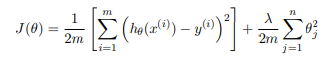

Com ela, é possível implmentar a função de custo da regressão linear regularizada $J(\theta)$, que torna $\lambda$ um hiperparâmetro moderador do grau de regularização de J. 

In [ ]:
def custo_reglin_regularizada(theta, X, y, _lambda):
    # Quantidade de exemplos
    m = len(X)
    theta = np.matrix(theta)

    # não considera theta0 para o cálculo
    theta_j = theta[:,1:]
    regularizacao = (_lambda /(2 * m)) * np.sum(theta_j.dot(theta_j.T))    

    erro = X.dot(theta.T) - y

    # Computa a função de custo J
    J = (np.sum(np.power(erro, 2)))/ (2 * m) 
    
    return J + regularizacao

In [ ]:


_lambda = 1
theta = np.array([[1,1]]) #inicialização
J = custo_reglin_regularizada(theta, X, y, _lambda)
print('Custo = ', J)

Custo =  303.9931922202643


### 5.3 Gradiente na regressão linear regularizada

A função abaixo realiza a regularização do gradiente descendente da função linear. Os comandos serão aplicados no mesmo *dataframe* utilizado, porém com  $\theta$ = (1,1) e $\lambda=1$.


In [ ]:
def gd_reglin_regularizada(theta, X, y, _lambda):
    m = len(X)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    erro = (X.dot(theta.T)) - y
    
    gradient = X.T.dot(erro) / m

    theta_j = theta[:,1:]
    regularizacao = (_lambda / m) * theta_j
    # insere zero como termo de regularização para theta0
    regularizacao = np.insert(regularizacao, 0, 0, axis=1)

    return gradient + regularizacao.T

Retorno do vetor gradiente e teste de corretude com  θ =(1,1)

In [ ]:
theta = np.array([[1,1]]) #inicialização
gradiente = gd_reglin_regularizada(theta, X, y, _lambda=1)

print('Gradiente\n', gradiente)

Gradiente
 [[-15.30301567]
 [598.25074417]]


### 5.4 Ajustando os parâmetros da regressão linear

A função abaixo computa valores ótimos para θ, porém sem a regularização, ou seja, com λ=0. 

A bilioteca scipy será utilizada a fim de obter-se o retorno com o comando opt.fminc.

In [ ]:
def minimizar_funcao(theta, X, y, _lambda):
    return opt.fmin_tnc(func = custo_reglin_regularizada, 
                        x0 = theta, 
                        fprime = gd_reglin_regularizada, 
                        args = (X, y, _lambda))

Definindo  λ=0 para evitar a regularicação

In [ ]:
_lambda = 0
result = minimizar_funcao(theta, X, y, _lambda)
theta = result[0]
J = custo_reglin_regularizada(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('Custo = ', J)

Vetor de parâmetros =  [13.08790367  0.36777923]
Custo =  22.373906495108923


Plotagem e visualização do gráfico.

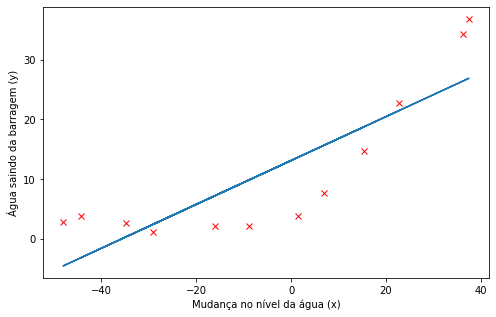

In [ ]:
h = X.dot(theta.T)
plot_ex5data1(_X, y)
plt.plot(_X, h)

# 6 Viés-Variância

O viés - variância é um importante conceito para o Aprendizado de Máquina. Trata-se do relacionamento entre viés (*bias*) e variância (*variance*) de um modelo de aprendizado. 

É importante ressaltar que  modelos com *bias* elevado não são suficientemente complexos para os dados, podendo sofrer com subajuste (*underfitting*). Já os modelos com alta variância tendem a sofrer de sobreajuste (*overfitting*).

Desta forma, ao realizar o treinamento de um modelo, a viés e a variância desempenham um papel fundamental para atingir a precisão necessária. Assim, o objetivo é chegar a um equilíbrio entre o viés e a variância a fim de  evitar o *overfitting* e *underfitting* do modelo. Este compromisso é denominado *Tradeoff*.

### 6.1 Curvas de Aprendizado

Optou-se por importar 

Função para o plot ou visualização do gráfico. Ela incluí os rótulos que definem itens como as cores e legendas das curvas de treinamento (com base nos cálculos da função abaixo denominda *learningCurve* e nomeia os eixos X e Y. 

In [ ]:
def plot_learning_curve(x,y_treino, y_val, titulo=None):
    plt.figure(figsize=(8,5))
    plt.plot(x,y_treino,label='Treinamento')
    plt.plot(x,y_val,label='Validação cruzada')
    plt.title('Curva de aprendizado para regressão linear')
    plt.xlabel('Número de exemplos treinados')
    plt.ylabel('Erro')
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0,y2))
    plt.legend()
    plt.title(titulo)
    
    plt.show()


A função abaixo realiza o cálculo dos erros com base em um conjunto de treino e um conjunto de validação. Assim, é possível chegar à comparação entre as duas situações e gerar a curva de aprendizado que pode ser visualmente verificada em um gráfico.

In [ ]:
def learningCurve(theta, X, y, X_val, y_val, _lambda):
    m = len(X)
    erros_treino = np.zeros(m)
    erros_val = np.zeros(m)
    qtds_exemplos = []
    
    for i in range(1,m+1):
        X_train = X[:i,:]
        y_train = y[:i]
        qtds_exemplos.append(len(X_train))
        
        result = minimizar_funcao(theta, X_train, y_train, _lambda)
        theta = result[0]
        
        J_train = custo_reglin_regularizada(theta, X_train, y_train, _lambda=0)
        J_val = custo_reglin_regularizada(theta, X_val, y_val, _lambda)
        
        erros_treino[i-1] = J_train
        erros_val[i-1] = J_val
    
    return qtds_exemplos, erros_treino, erros_val

Inicializa o treino com θ = 1

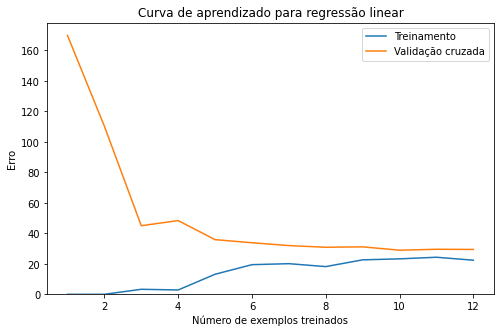

In [ ]:
theta = np.array([[1,1]]) #inicialização
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X, y, Xval, yval, _lambda=0)

titulo = 'Curva de aprendizado para regressão linear'
plot_learning_curve(numero_exemplos, erros_treino, erros_val, titulo)

# 7. Regressão Polinomial

O mesmo conjunto de dados da sessão anterior será aplicado nesta etapa. Abaixo, a função que mapeia rapidamente o conjunto de dados original.

In [ ]:
print('X original\n',_X[:5,:])

X original
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]]


### 7.1 Regressão Polinomial - aprendizado

Como o modelo linear é muito simples, resultando em *underfitting*, *i.e*, viés alto, novas caracteríscas com polinômio de grau 8 serão aplicadas a X.

In [ ]:
def poly_features(X, p):
    
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)

    return X_poly

In [ ]:
grau = 8
X_poli = poly_features(_X, grau)

Chamando novamente função de normalização a fim de igualar as escalas das características.

In [ ]:
# normalização Z-Score
def normalizar_caracteristica(X):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_norm = (X - mean_X) / std_X
    return X_norm, mean_X, std_X


A aprendizagem dos parâmetros segue-se a seguir com diferentes características.

In [ ]:
X_norm, mean_X, std_X = normalizar_caracteristica(X_poli)
print(X_norm[:5,:3]) #exibição somente das 3 primeiras colunas

[[-3.78243704e-01 -7.88662325e-01  1.90328720e-01]
 [-8.38920100e-01  1.31420204e-03 -2.58961742e-01]
 [ 1.43871736e+00  6.10831582e-01  1.30534069e+00]
 [ 1.48412330e+00  7.38068463e-01  1.42031240e+00]
 [-1.49791929e+00  1.93643966e+00 -2.12774745e+00]]


In [ ]:
X_norm = np.insert(X_norm, 0, 1, axis=1)
print(X_norm[:5,:4]) #exibição somente das 4 primeiras colunas

[[ 1.00000000e+00 -3.78243704e-01 -7.88662325e-01  1.90328720e-01]
 [ 1.00000000e+00 -8.38920100e-01  1.31420204e-03 -2.58961742e-01]
 [ 1.00000000e+00  1.43871736e+00  6.10831582e-01  1.30534069e+00]
 [ 1.00000000e+00  1.48412330e+00  7.38068463e-01  1.42031240e+00]
 [ 1.00000000e+00 -1.49791929e+00  1.93643966e+00 -2.12774745e+00]]


In [ ]:
_lambda = 0.003
theta = np.ones((X_norm.shape[1])) #inicialização
result = minimizar_funcao(theta, X_norm, y, _lambda)
theta = result[0]

print('Vetor de parâmetros\n',theta)

Vetor de parâmetros
 [ 11.21758156  11.23243789  13.34820938   8.58292448  -9.26145596
 -10.73863263   4.12880494   1.77973445  -3.39673752]


Plotagem ou visualização de gráfico com as características de aprendizagem. Conforme pode ser analisado pelo grau da curva, o modelo agora apresenta alta variância.

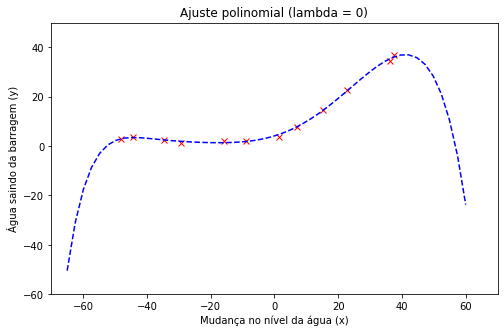

In [ ]:
x = np.linspace(-65,60,50)
x = x.reshape((len(x),1))
x_poli = poly_features(x, grau)
x_poli = (x_poli - mean_X) / std_X
x_poli = np.insert(x_poli, 0, 1, axis=1)

h = x_poli.dot(np.matrix(theta).T)

plot_ex5data1(_X, y)
plt.plot(x, h, 'b--')
plt.title('Ajuste polinomial (lambda = 0)')
plt.axis((-70,70,-60,50))
plt.show()

O gráfico a seguir demonstra o baixo nível de erros da curva de aprendizado, que se aproxima de 0 no eixo y, ou seja, pé praticamente nulo, conforme demonstrado na linha azul (Treinamento). 

Já a curva com Validação cruzada, em laranja, possui certa instabilidade, levando mais tempo para minimizar a quantidade de erros, que, ainda, assim, mantém-se relativamente alta.

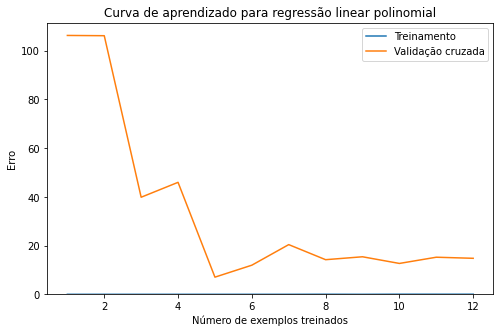

In [ ]:
X_poli_val = poly_features(_Xval, grau)
X_norm_val, _, _ = normalizar_caracteristica(X_poli_val)
X_norm_val = np.insert(X_norm_val, 0, 1, axis=1)

theta = np.ones((X_norm_val.shape[1])) #inicialização
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X_norm, y, X_norm_val, yval, _lambda=0)

titulo = 'Curva de aprendizado para regressão linear polinomial'

plot_learning_curve(numero_exemplos, erros_treino, erros_val, titulo)

Fonte: 


https://www.ime.unicamp.br/~nancy/Cursos/me104/regressao.pdf

https://oestatistico.com.br/regressao-linear-simples/

https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137

https://matheusfacure.github.io/2017/02/20/MQO-Gradiente-Descendente/

https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1

https://medium.com/turing-talks/turing-talks-20-regress%C3%A3o-de-ridge-e-lasso-a0fc467b5629